In [42]:
import os
try:
    path_initialized
except NameError:
    path_initialized = True
    os.chdir('..')

import json
import numpy as np
import matplotlib.pyplot as plt
import swiper.plot as plotter
from typing import Any

In [43]:
# directory = 'slurm/data/20241112_151345'
# directory = 'slurm/data/20241113_075122'
directory = 'slurm/data/20241113_081402'

In [44]:
with open(f'{directory}/config.json', 'r') as f:
    config = json.load(f)

In [45]:
data_by_config = {}

for file in os.listdir(f'{directory}/output/'):
    print(file)
    with open(f'{directory}/output/{file}', 'r') as f:
        contents = f.read()
        if len(contents) == 0:
            print('Empty file!')
            continue
        data = json.loads(contents)
    config_idx = int(file.split('_')[0][6:])
    data_by_config[config_idx] = data

config1961_d21_parallel_separate_qrom_15_15_12.json
config2968_d21_aligned_separate_qrom_15_15_9.json
config2330_d21_parallel_separate_qrom_15_15_18.json
config2120_d21_parallel_separate_qrom_15_15_15.json
config1860_d21_parallel_separate_qrom_15_15_11.json
config319_d21_sliding_separate_qrom_15_15_5.json
config2072_d21_parallel_separate_qrom_15_15_14.json
config1608_d21_parallel_separate_qrom_15_15_6.json
config2214_d21_parallel_separate_qrom_15_15_16.json
config2422_d21_aligned_separate_qrom_15_15_0.json
config2877_d21_aligned_separate_qrom_15_15_7.json
config1196_d21_sliding_separate_qrom_15_15_19.json
config2601_d21_aligned_separate_qrom_15_15_3.json
config1606_d21_parallel_separate_qrom_15_15_6.json
config1198_d21_sliding_separate_qrom_15_15_19.json
config1645_d21_parallel_separate_qrom_15_15_7.json
config258_d21_sliding_separate_qrom_15_15_4.json
config1920_d21_parallel_separate_qrom_15_15_12.json
config1670_d21_parallel_separate_qrom_15_15_7.json
config2988_d21_aligned_separate_

In [46]:
def benchmark_name(conf):
    return conf['benchmark_file'].split('/')[-1].split('.')[0]

def get_config_idx(config, schedule_name, config_match):
    for idx, conf in enumerate(config):
        if benchmark_name(conf) == schedule_name and all(conf[k] == v for k, v in config_match.items()):
            return idx
    return None

def get_data(config, data_by_config, schedule_name, config_match):
    config_idx = get_config_idx(config, schedule_name, config_match)
    if config_idx is None:
        return None
    return data_by_config[config_idx]

In [47]:
ordered_configs = [
    ('sliding', 'successors'),
    ('parallel', 'successors'),
    ('aligned', 'successors'),
    ('sliding', 'descendants'),
    ('parallel', 'descendants'),
    ('aligned', 'descendants'),
]

In [48]:
data_by_config[59]['decoding_data']['max_parallel_processes']

5011

In [ ]:
# TODO: some results may not have completed
organized_data = {}
for config_idx, data in data_by_config.items():
    organized_data.setdefault((config[config_idx]['scheduling_method'], config[config_idx]['poison_policy']), {}).setdefault(config[config_idx]['missed_speculation_modifier'], {}).setdefault(float(config[config_idx]['decoder_latency_or_dist_filename'].split('*')[-1]), []).append(data['decoding_data']['max_parallel_processes'])

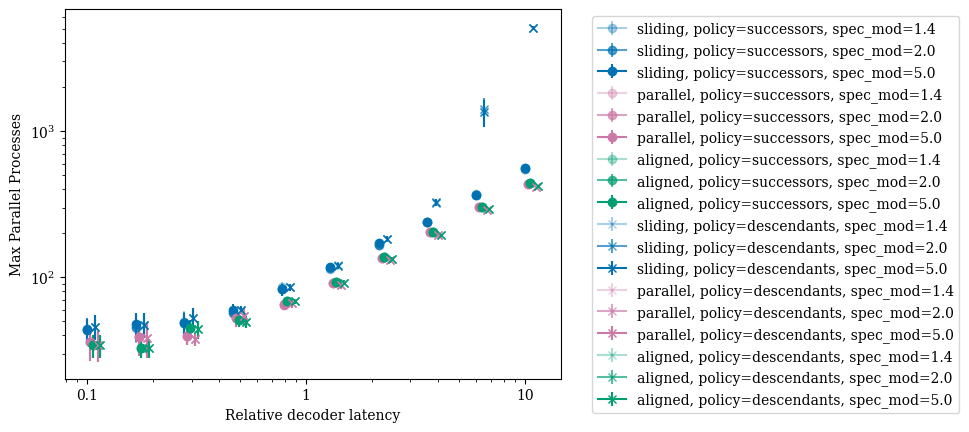

In [68]:
for i,key in enumerate(ordered_configs):
    color = f'C{i%3}'
    marker = 'o' if i < 3 else 'x'
    for j,spec_mod in enumerate(sorted(organized_data[key].keys())):
        alpha = (j+1)/(len(organized_data[key].keys()))
        for latency in sorted(organized_data[key][spec_mod].keys()):
            # plt.plot(latency, np.mean(organized_data[key][latency]), 'o', color=color, marker=marker)
            plt.errorbar(latency * (1 + 0.03*i), np.mean(organized_data[key][spec_mod][latency]), yerr=np.std(organized_data[key][spec_mod][latency]), color=color, marker=marker, alpha=alpha, label=(f'{key[0]}, policy={key[1]}, spec_mod={spec_mod}' if latency == 0.1 else None))
        # plt.plot(organized_data[key][0], organized_data[key][1], 'o', label=f'{key[0]}, policy={key[1]}', color=color, marker=marker)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.yscale('log')
plt.ylabel('Max Parallel Processes')
plt.xlabel('Relative decoder latency')
plt.xscale('log')
plt.xticks([0.1, 1, 10], ['0.1', '1', '10'])
plt.show()

In [63]:
organized_runtime_data = {}
for config_idx, data in data_by_config.items():
    organized_runtime_data.setdefault((config[config_idx]['scheduling_method'], config[config_idx]['poison_policy']), {}).setdefault(config[config_idx]['missed_speculation_modifier'], {}).setdefault(float(config[config_idx]['decoder_latency_or_dist_filename'].split('*')[-1]), []).append(data['device_data']['num_rounds'])

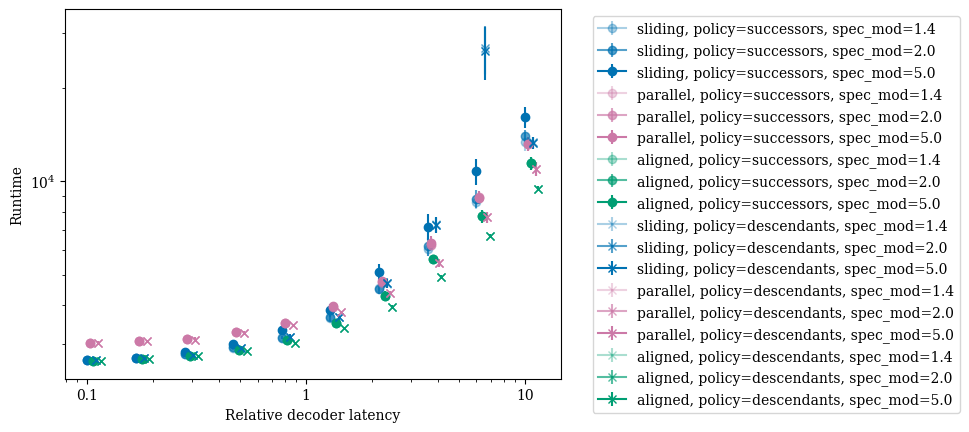

In [69]:
for i,key in enumerate(ordered_configs):
    color = f'C{i%3}'
    marker = 'o' if i < 3 else 'x'
    for j,spec_mod in enumerate(sorted(organized_runtime_data[key].keys())):
        alpha = (j+1)/(len(organized_runtime_data[key].keys()))
        for latency in sorted(organized_runtime_data[key][spec_mod].keys()):
            # plt.plot(latency, np.mean(organized_data[key][latency]), 'o', color=color, marker=marker)
            plt.errorbar(latency * (1 + 0.03*i), np.mean(organized_runtime_data[key][spec_mod][latency]), yerr=np.std(organized_runtime_data[key][spec_mod][latency]), color=color, marker=marker, alpha=alpha, label=(f'{key[0]}, policy={key[1]}, spec_mod={spec_mod}' if latency == 0.1 else None))
        # plt.plot(organized_data[key][0], organized_data[key][1], 'o', label=f'{key[0]}, policy={key[1]}', color=color, marker=marker)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.yscale('log')
plt.ylabel('Runtime')
plt.xlabel('Relative decoder latency')
plt.xscale('log')
plt.xticks([0.1, 1, 10], ['0.1', '1', '10'])
plt.show()

In [73]:
organized_runtime_data[('sliding', 'descendants')][5.0][5.994842503189409]

[27577,
 20652,
 32077,
 18938,
 26376,
 18833,
 34127,
 26959,
 27256,
 30284,
 28098,
 19807,
 36829,
 25296,
 26945,
 20016,
 23445,
 30165]